# Testing trajectories for 4WIS4WID WCR

#### Intro

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [75]:
def plot_trajectory(x, y, theta, v_x, v_y, t, label):
    fig, ax = plt.subplots(2, 3, figsize=(6, 4), tight_layout=True)
    fig.suptitle(r'Linear trajctory in $X$ direction')
    ax[0, 0].plot(x, y, linestyle='-')
    ax[0, 0].set(xlabel=r'$x_d$', ylabel=r'$y_d$')                     
    ax[0, 0].set_title(r'$x_d - y_d$')                          
    ax[0, 0].minorticks_on()
    ax[0, 0].grid(which='minor') 
    
    ax[0, 1].plot(t, x, linestyle='-')
    ax[0, 1].set(xlabel=r'$t$', ylabel=r'$x_d(t)$')                      
    ax[0, 1].set_title(r'$x_d(t) - t$')                             
    ax[0, 1].minorticks_on()
    ax[0, 1].grid(which='minor') 
    
    ax[0, 2].plot(t, y, linestyle='-')
    ax[0, 2].set(xlabel=r'$t$', ylabel=r'$y_d$')                      
    ax[0, 2].set_title(r'$y_d(t) - t$')                             
    ax[0, 2].minorticks_on()
    ax[0, 2].grid(which='minor') 
    
    ax[1, 0].plot(t, theta, linestyle='-')
    ax[1, 0].set(xlabel=r'$t$', ylabel=r'$\theta$')                      
    ax[1, 0].set_title(r'$\theta_d(t) - t$')                           
    ax[1, 0].minorticks_on()
    ax[1, 0].grid(which='minor')  
    
    ax[1, 1].plot(t, v_x, linestyle='-')
    ax[1, 1].set(xlabel=r'$t$', ylabel=r'$v_x(t)$')                      
    ax[1, 1].set_title(r'$v_x(t) - t$')                           
    ax[1, 1].minorticks_on()
    ax[1, 1].grid(which='minor')
    
    ax[1, 2].plot(t, v_y, linestyle='-')
    ax[1, 2].set(xlabel=r'$t$', ylabel=r'$v_y(t)$')                      
    ax[1, 2].set_title(r'$v_y(t) - t$')                           
    ax[1, 2].minorticks_on()
    ax[1, 2].grid(which='minor')
    

## Linear trajectories

### Linear trajectory in $X$ axis direction: <br>

$x_d(t) = v_x * t$ <br>
$y_d(t) = 0$ <br>
$\theta_d(t) = \text{atan2}(\frac{y_d}{x_d}) = 0$

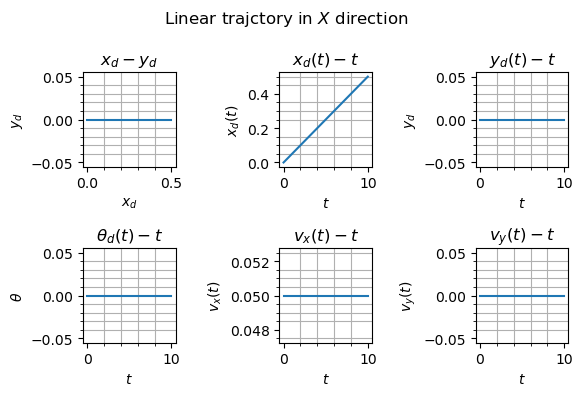

In [76]:
duration = 10 #s
v_x = 0.05 #m/s
v_y = 0.00 #
dt = 0.01 #s

t = np.arange(0,duration + dt, dt)
x_d = v_x*t
y_d = np.zeros(len(t))
theta_d = np.arctan2(y_d, x_d)

plot_trajectory(x_d, y_d, theta_d, np.ones(len(t))*v_x, np.ones(len(t))*v_y, t,  "x(t) = v_x*t")

### Linear trajectory in $Y$ axis direction - angle follows trajectory: <br>

$x_d(t) = 0$ <br>
$y_d(t) = v_y * t$ <br>
$\theta_d(t) = \text{atan2}(\frac{y_d}{x_d})$

[0.     0.0005 0.001  ... 0.499  0.4995 0.5   ]
1.5707963267948966


ValueError: x and y must have same first dimension, but have shapes (1001,) and (1,)

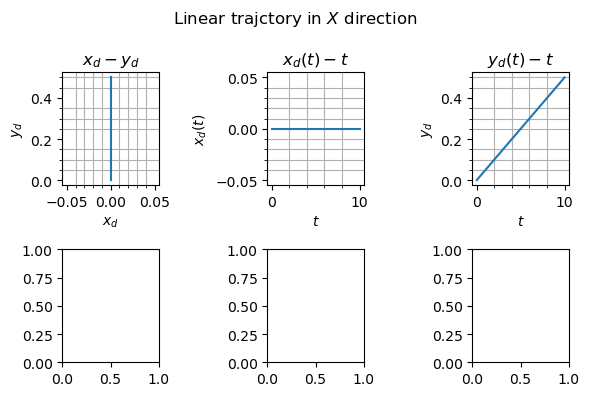

In [82]:
duration = 10 #s
v_x = 0.0 #m/s
v_y = 0.05 #
dt = 0.01 #s

t = np.arange(0,duration + dt, dt)
x_d = np.zeros(len(t))
y_d = v_y*t
#theta_d = np.unwrap(np.arctan2(v_y,v_x))
print(y_d)
print(theta_d)

plot_trajectory(x_d, y_d, theta_d, np.ones(len(t))*v_x, np.ones(len(t))*v_y, t,  "x(t) = v_x*t")

### Linear trajectory in $Y$ axis direction - angle is 0 (WCR): <br>

$x_d(t) = 0$ <br>
$y_d(t) = v_y * t$ <br>
$\theta_d(t) = 0$

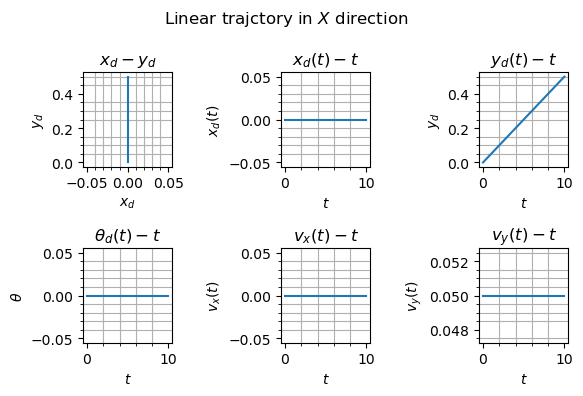

In [83]:
duration = 10 #s
v_x = 0.0 #m/s
v_y = 0.05 #
dt = 0.01 #s

t = np.arange(0,duration + dt, dt)
x_d = np.zeros(len(t))
y_d = v_y*t
theta_d = np.zeros(len(t))

plot_trajectory(x_d, y_d, theta_d, np.ones(len(t))*v_x, np.ones(len(t))*v_y, t,  "x(t) = v_x*t")

## Circular trajectories

### Circular trajectory in CCW direction - angle follows trajectory: 

$x_d(t) = r \cdot \sin{(\omega_r \cdot t)}$ <br>
$y_d(t) = r \cdot [1 - \cos{(\omega_r \cdot t)}]$ <br>
$\theta_d(t) = \text{atan2}(\frac{v_y}{v_x})$

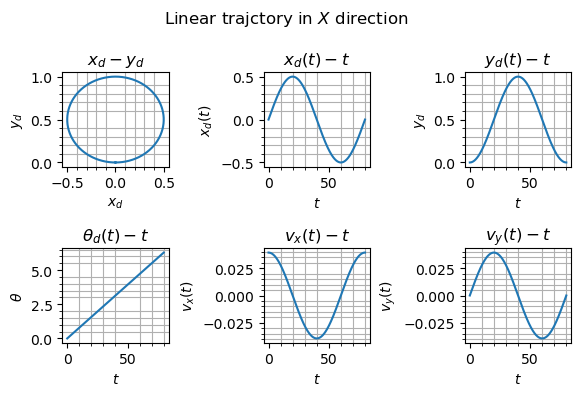

In [73]:
duration = 80 #s
dt = 0.01 #s
t = np.arange(0,duration + dt, dt)

radius = 0.5
angular_velocity = (2*np.pi)/80

x_d = radius * np.sin(angular_velocity * t) #m
y_d = radius * (1 - np.cos(angular_velocity * t)) #m


v_x =  radius * angular_velocity * np.cos(angular_velocity * t) #m/s
v_y = radius * angular_velocity * np.sin(angular_velocity * t) #m/s

theta_d = np.unwrap(np.arctan2(v_y,v_x))

plot_trajectory(x_d, y_d, theta_d, np.ones(len(t))*v_x, np.ones(len(t))*v_y, t,  "x(t) = v_x*t")

### Circular trajectory in CW direction - angle follows trajectory:

$x_d(t) = r \cdot \sin{(\omega_r \cdot t)}$ <br>
$y_d(t) = r \cdot [1 - \cos{(\omega_r \cdot t)}]$ <br>
$\theta_d(t) = \text{atan2}(\frac{v_y}{v_x})$